1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import matplotlib.pyplot as plt
import numpy as np

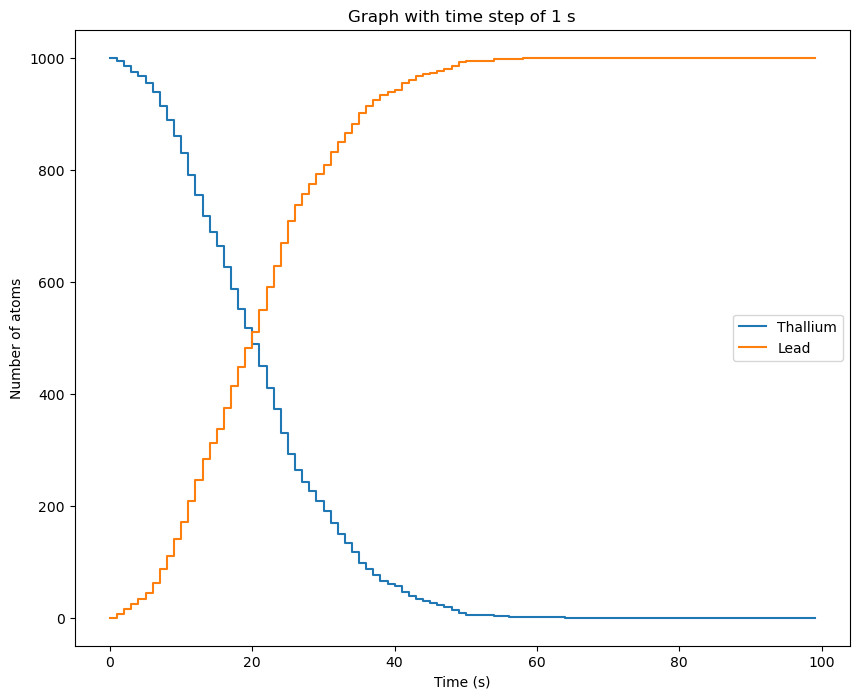

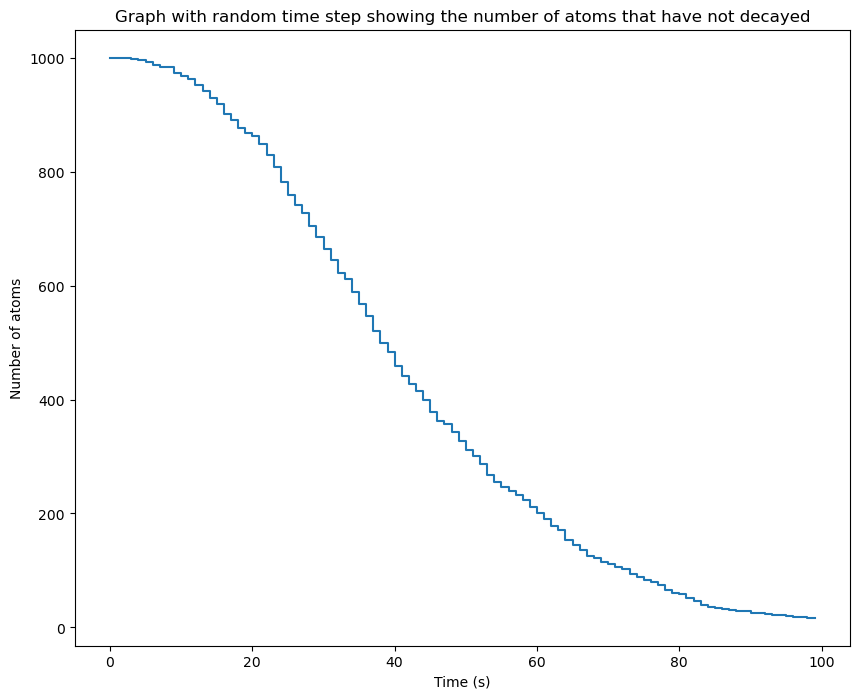

In [2]:
def p1(t):
    tau = 3.052*60
    return 1-2**(-(t/tau))
def invp2(p,tau=3.052*60):
   return -tau * np.log2(1 - p)
atoms = 1000
lead = np.full(atoms,0) 
thallium = np.full(atoms, atoms)
time = np.arange(0,atoms)
pos_time = time[1:]
for i in range(len(pos_time)):
   decayed = np.random.rand(thallium[i-1]) < p1(i-1)
   thallium[i] = thallium[i-1] - np.sum(decayed)
   lead[i] = lead[i-1] + np.sum(decayed)
plt.figure(figsize=(10,8))
# I show the graphs up to 100 time step as I saw that during this time interval all thallium atoms decay.
plt.step(time[:100],thallium[:100], label="Thallium")
plt.step(time[:100],lead[:100], label="Lead")
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.title('Graph with time step of 1 s')
plt.legend()
plt.show()
x = np.random.rand(atoms)
decay_time = np.sort(invp2(x))
atoms = np.full(atoms, atoms)
for i in range(1,len(decay_time)):
   decayed = np.random.rand(atoms[i-1]) < p1(decay_time[i-1])
   atoms[i] = atoms[i-1] - np.sum(decayed)
plt.figure(figsize=(10,8))
plt.step(time[:100], atoms[:100])
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.title('Graph with random time step showing the number of atoms that have not decayed')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

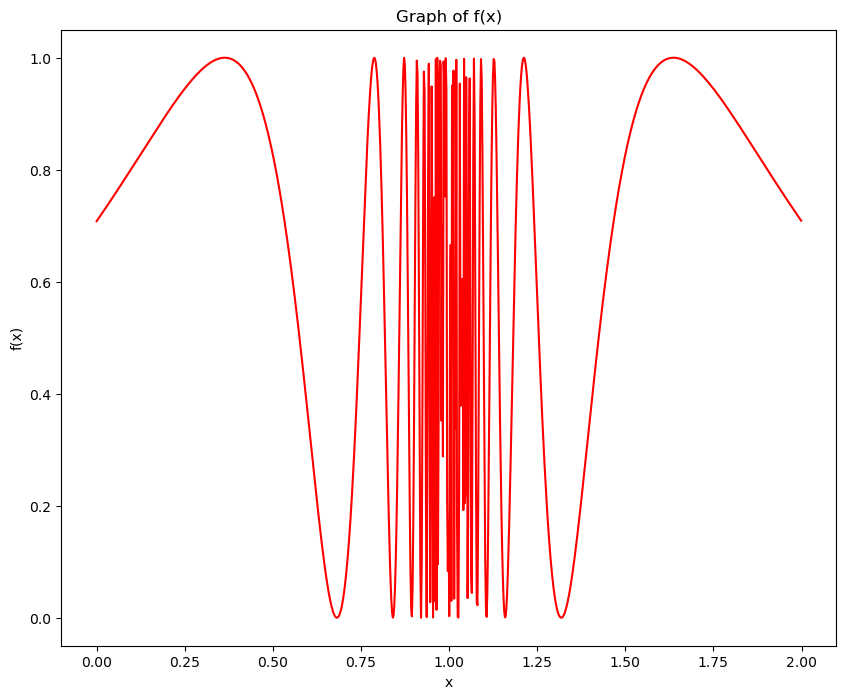

The mean of the N integrals calculated with the hit and miss method is: 1.345706
The standard deviation of the N integrals calculated with the hit and miss method is: 0.030845770601494106
The integral calculated with the hit and miss method: 1.346 +- 0.001
Integral with the mean value method with error evaluation: 1.339 +- 0.010
There is a sufficient number of iteration for the Monte Carlo method so that its error is equal to sigma/sqrt(N) and for a sufficiently large N this value is less than the error provided by the mean value method.


'As we can see from the graph of the sigmas, for smaller values of N it is preferable to use the mean value method. However, given a large value of N, hit and miss becomes the method that has less error.'

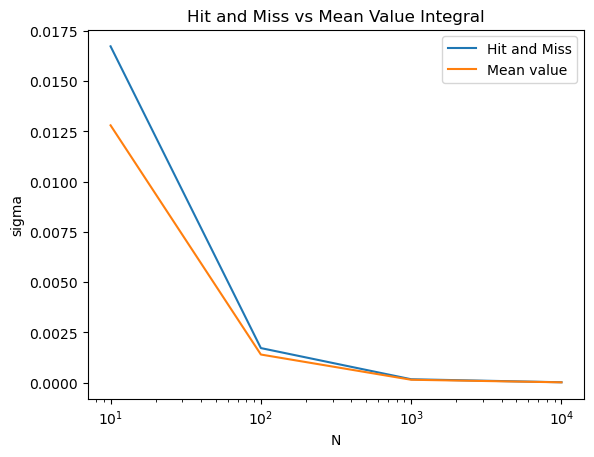

In [3]:
def f(x):
    return np.sin(1/(1-x))**2
def hit_and_miss(a,b,h,n):
    count = 0
    for i in range(n):
        x = (b - a) * np.random.random() # x is random uniform between 0 and h
        y =  h * np.random.random()     # y is random uniform between a and b
        if y < f(x): count += 1
    I = count / n * h * (b - a)
    return I # The value of the integral calculated with the hit and miss method
def calc_sigma_mc(a, b, h, n, N):
    integral = np.array([hit_and_miss(a, b, h, n) for i in np.arange(N)])
    sigma = np.sqrt(np.mean(integral**2) - np.mean(integral)**2)
    return sigma
x=np.linspace(0, 1.999, 1000)
plt.figure(figsize=(10,8))
plt.title("Graph of f(x)")
plt.plot(x, f(x), 'r-')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()
N = 1000
a, b, h = 0, 2, 1
integrals = []
for i in range(N):
    integrals.append(hit_and_miss(a,b,h,N))
mean_integral = np.mean(integrals)
print(f"The mean of the N integrals calculated with the hit and miss method is: {mean_integral}")
std_integral = np.std(integrals)
print(f"The standard deviation of the N integrals calculated with the hit and miss method is: {std_integral}")
mc_error = std_integral/np.sqrt(N)
print("The integral calculated with the hit and miss method: %.3f +- %.3f" % (mean_integral, mc_error))
def mean_value(x_min, x_max, n):
    xi = np.random.uniform(x_min, x_max, n)
    yi = np.array([f(xii) for xii in xi])
    s = np.sum(yi)
    integ = (x_max - x_min) / n * s
    return integ
integr = mean_value(a, b, N)
M = N
def calc_sigma(x_min, x_max, n, m):
    integrs = np.array([mean_value(x_min, x_max, n) for mi in np.arange(m)])
    sigma = np.sqrt(np.mean(integrs**2) - np.mean(integrs)**2)
    return sigma

sigma = calc_sigma(a, h, N, M)
print("Integral with the mean value method with error evaluation: %.3f +- %.3f" % (integr, sigma))
if(mc_error>sigma):
    print("The error of the Monte Carlo method is higher than that of the mean value one. This is due to the limited number of iterations.")
else:
    print("There is a sufficient number of iteration for the Monte Carlo method so that its error is equal to sigma/sqrt(N) and for a sufficiently \
large N this value is less than the error provided by the mean value method.")
iterations = np.array([10, 100, 1000, 10000])
sigmas_hm = np.array([(np.sqrt(calc_sigma_mc(a, b, h, N, ni)) / ni) for ni in iterations])
sigmas_mv = np.array([(np.sqrt(calc_sigma(a, b, N, ni)) / ni) for ni in iterations])
plt.plot(iterations, sigmas_hm, label='Hit and Miss')
plt.plot(iterations, sigmas_mv, label='Mean value')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('sigma')
plt.legend()
plt.title("Hit and Miss vs Mean Value Integral")
'''As we can see from the graph of the sigmas, for smaller values of N it is preferable to use the mean value method. However, given a large value of \
N, hit and miss becomes the method that has less error.'''

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
'''For this exercise I developed two almost identical approaches where in the second the Monte Carlo integration is defined in a method. The 
generalization to a 10D sphere is expressed in the last cell of the exercise and it is immediate following the second approach described. In fact, by 
using the function $f_higher()$ we can inspect functions with whatever order. In this case the only thing to be modified would be the analytical 
solution.'''

'For this exercise I developed two almost identical approaches where in the second the Monte Carlo integration is defined in a method. The \ngeneralization to a 10D sphere is expressed in the last cell of the exercise and it is immediate following the second approach described. In fact, by \nusing the function $f_higher()$ we can inspect functions with whatever order. In this case the only thing to be modified would be the analytical \nsolution.'

In [5]:
dim = 2 
n = 1000000
Zn = 0
for i in range(n):
    # I can just take a random number between [0,1] as it is then elevated to the power of 2.
    x = np.random.uniform() 
    y = np.random.uniform()
    r = np.sqrt(x**2 + y**2) 
    if r <= 1: 
        Zn += 1 
mc_area = 2**dim*Zn/n 
analytic_sol = np.pi; 
print('The area of a circle of unit radius using the Monte Carlo method is', mc_area)
print('The exact area is', analytic_sol, 'and the ratio of the two is', mc_area/analytic_sol)

The area of a circle of unit radius using the Monte Carlo method is 3.141144
The exact area is 3.141592653589793 and the ratio of the two is 0.999857189126897


In [6]:
def f(X):
    x = X[0]
    y = X[1]
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0
def monte_carlo(f, a, b, dim, n = 1000):
    # dim = dimensions of function
    X = np.random.uniform(a, b, (n, dim))
    y = []
    for i in range(len(X)):
        y.append(f(X[i]))
    # This check is to make sure that even when n=1 the method holds.
    if type(y) != 'int':
        y_mean =  sum(y)/len(y)
    else:
        y_mean = y
    domain = np.power(b-a, dim)
    integ = domain * y_mean
    return integ
# By setting n=1000000 we get a result which is almost equal to the analytical one.
mc_integrated = monte_carlo(f, -1, 1, 2, 1000000)
analytic_sol = np.pi
print(f"Monte Carlo solution of the area of the circle: {mc_integrated}")
print(f"Analytical solution: {analytic_sol}")
print(f"The ratio between the two is: {mc_integrated/analytic_sol}")

Monte Carlo solution of the area of the circle: 3.142308
Analytical solution: 3.141592653589793
The ratio between the two is: 1.000227701834415


In [7]:
def f_higher(X):
    Rs = 0
    for i in range(len(X)):
        Rs += X[i]**2
    R = np.sqrt(Rs)
    if R<=1: return 1
    else: return 0
mc_integrated = monte_carlo(f_higher, -1, 1, 10, 1000000)
analytic_sol = (np.pi**5)/120
print(f"Monte Carlo solution of the volume of the 10D sphere: {mc_integrated}")
print(f"Analytical solution: {analytic_sol}")
print(f"The ratio between the two is: {mc_integrated/analytic_sol}")

Monte Carlo solution of the volume of the 10D sphere: 2.542592
Analytical solution: 2.550164039877345
The ratio between the two is: 0.9970307636062073


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
import numpy as np

def f(x):
    num = x**(-1/2)
    den = np.exp(x) + 1
    return num/den
def w(x):
   return 1 / (2 * np.sqrt(x)) # I saw that if we multiply a factor 2 for the square root of x the integral is calculated correctly.
def cdf(x):
    '''Cumulative distribution function of the weight function'''
    return np.sqrt(x)
def icdf(x):
    y = np.sqrt(x)
    return x**2
n = 100000
a = 0
b = 1
x = np.random.uniform(low=a, high=b, size=n) # n Random uniformly distributed numbers between [0,1]
y = icdf(x)
analytic_sol = 0.838932960
integral = (1 / n ) * np.sum(f(y) / w(y)) * (cdf(b) - cdf(a))
print("Importance sampling integral:", integral, ", with a relative error:", np.abs(integral-analytic_sol)/analytic_sol)
int_no_w = (1 / n ) * np.sum(f(x)) * (b - a)
print("Integral without importance sampling:", int_no_w, ", with a relative error:", np.abs(int_no_w-analytic_sol)/analytic_sol)

Importance sampling integral: 0.8390232728334387 , with a relative error: 0.00010765202673494167
Integral without importance sampling: 0.8453629586365505 , with a relative error: 0.007664496381868919
